# *Analysis of the SpeedDating dataset*


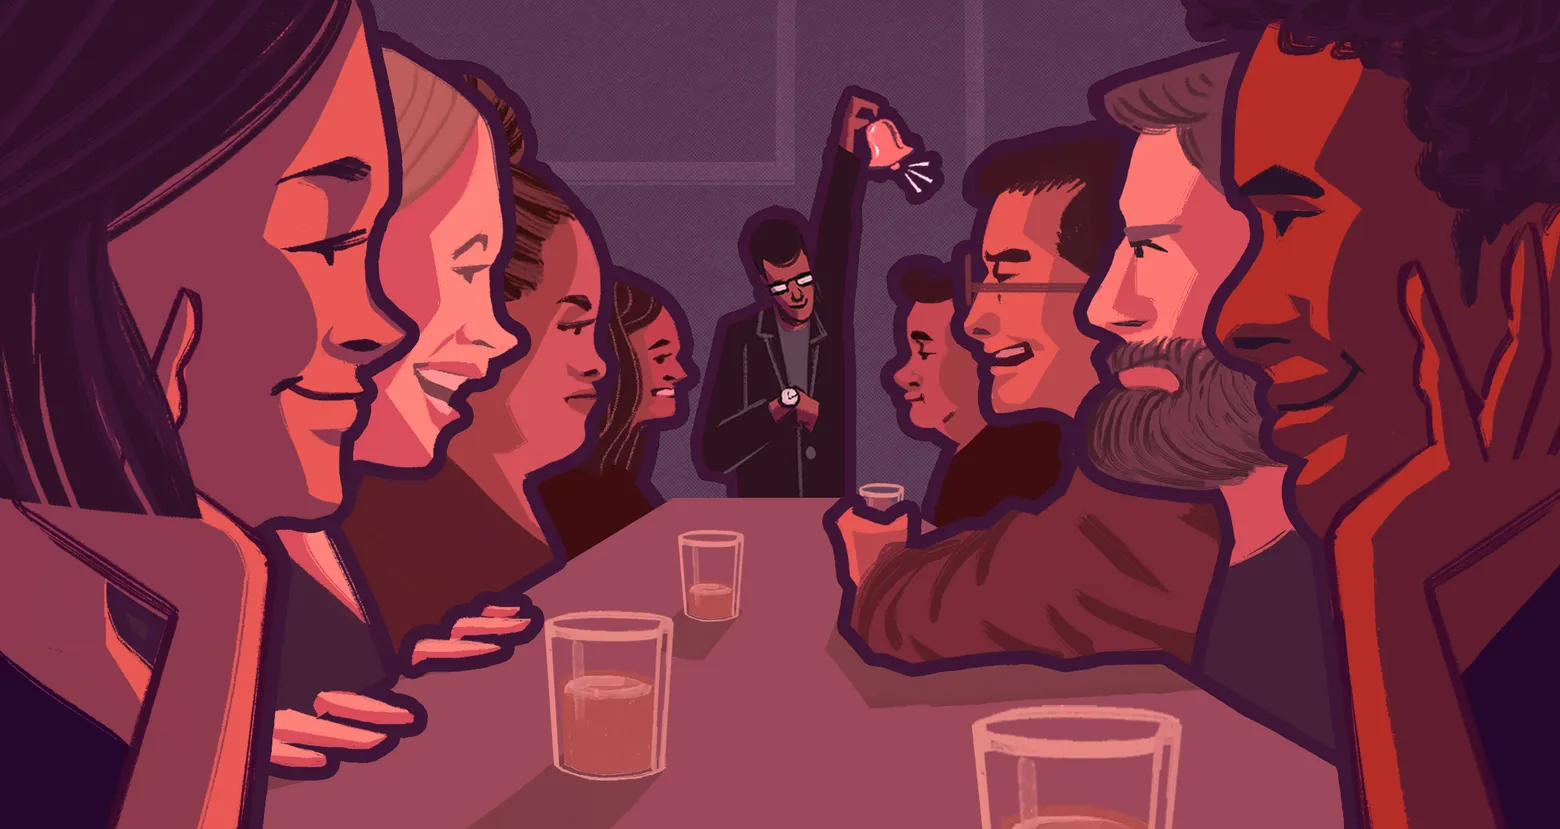

### Dataset: https://www.openml.org/search?type=data&sort=runs&id=40536&status=active
### Article: https://doi.org/10.1162/qjec.2006.121.2.673

## *Exploratory data analysis*

In [1]:
# Importing the libraries

# For data manipulation
import pandas as pd
import numpy as np
import os
from scipy.io import arff

# To plot the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# For Random Forest
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics  

# XGBoost Classifier
import xgboost as xgb

# Cross validation
from sklearn.model_selection import KFold, cross_val_score

# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# For validation
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import metrics from the sklearn module for confusion_matrix
from sklearn.metrics import confusion_matrix

# Xgboost
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Import warnings and add a filter to ignore them
import warnings
warnings.simplefilter('ignore')

In [2]:
os.getcwd()

'E:\\data_mining\\limbaje_de_procesare_si_analiza_dm'

In [3]:
os.chdir('E:\data_mining\limbaje_de_procesare_si_analiza_dm\data_sets') 

In [4]:
# importing the dataset and transform it to csv
data = arff.loadarff('speeddating.arff')
df = pd.DataFrame(data[0])
data1 = df.apply(lambda x: x.str.decode('utf-8') if x.dtypes == 'O' else x) 
data1.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1.0,female,21.0,27.0,6.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,0,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,1,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,...,[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,0,1.0,female,21.0,23.0,2.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1
4,0,1.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,...,[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1,1


In [5]:
# information about the structure of the dataset
data1.dtypes

has_null               object
wave                  float64
gender                 object
age                   float64
age_o                 float64
                       ...   
d_guess_prob_liked     object
met                   float64
decision               object
decision_o             object
match                  object
Length: 123, dtype: object

In [6]:
# View the size of the data set
print(data1.shape)

(8378, 123)


In [7]:
# Checking the column names
data1.columns

Index(['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age',
       'race', 'race_o', 'samerace',
       ...
       'd_expected_num_interested_in_me', 'd_expected_num_matches', 'like',
       'guess_prob_liked', 'd_like', 'd_guess_prob_liked', 'met', 'decision',
       'decision_o', 'match'],
      dtype='object', length=123)

In [8]:
# Checking and transforming the type of variables (article)
data1[['wave', 'met']] = data1[['wave', 'met']].astype('category')

## *Inspection and cleaning of  the numerical variables*

In [9]:
# Inspect the numerical variables
numerical_variable = data1.select_dtypes(exclude = ['category', 'O']).columns.tolist()
print(numerical_variable)

['age', 'age_o', 'd_age', 'importance_same_race', 'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked']


In [10]:
# Descriptive statistics of the variables
# Saving in a different variable the name of the column, variable type, number of missing values and descriptive_statistics

def variable_descriptive_analysis(numerical_variable):
    column_name = column.name
    type_column = column.dtype
    missing_values = column.isna().sum()
    descriptive_statistics = column.describe()
    descriptive_statistics = descriptive_statistics.to_string(index = True).replace('\n', '\n ')
  
      
    # display the previously saved values in the variables 
    print(f'----------  {column_name}  ----------')
    print(f'Variable type: {type_column}')
    print(f'Number of missing values: {missing_values}')
    print(f'Descriptive_statistics: \n {descriptive_statistics}')
    print('----------\n')
    return None

In [11]:
for each in data1.select_dtypes(exclude = ['category', 'O']):
    column = data1[each]
    variable_descriptive_analysis(column)

----------  age  ----------
Variable type: float64
Number of missing values: 95
Descriptive_statistics: 
 count    8283.000000
 mean       26.358928
 std         3.566763
 min        18.000000
 25%        24.000000
 50%        26.000000
 75%        28.000000
 max        55.000000
----------

----------  age_o  ----------
Variable type: float64
Number of missing values: 104
Descriptive_statistics: 
 count    8274.000000
 mean       26.364999
 std         3.563648
 min        18.000000
 25%        24.000000
 50%        26.000000
 75%        28.000000
 max        55.000000
----------

----------  d_age  ----------
Variable type: float64
Number of missing values: 0
Descriptive_statistics: 
 count    8378.000000
 mean        4.185605
 std         4.596171
 min         0.000000
 25%         1.000000
 50%         3.000000
 75%         5.000000
 max        37.000000
----------

----------  importance_same_race  ----------
Variable type: float64
Number of missing values: 79
Descriptive_statisti

In [12]:
# Transform the values from gaming, reading > 10 into 10 (because their interest in these activities can only be 
# measured in the interval [1-10])

data1['gaming'] = data1.apply(lambda x: 10 if x.gaming > 10 else x.gaming, axis = 1)
data1['reading'] = data1.apply(lambda x: 10 if x.reading > 10 else x.gaming, axis = 1)

In [13]:
# Identifying the percentage of missing values for each variable

percent_missing = data1.isnull().sum() * 100 / len(data1)
missing_value_df = pd.DataFrame({'column_name': data1.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
has_null,has_null,0.000000
wave,wave,0.000000
gender,gender,0.000000
age,age,1.133922
age_o,age_o,1.241346
...,...,...
d_guess_prob_liked,d_guess_prob_liked,0.000000
met,met,4.476009
decision,decision,0.000000
decision_o,decision_o,0.000000


<AxesSubplot:xlabel='percent_missing', ylabel='column_name'>

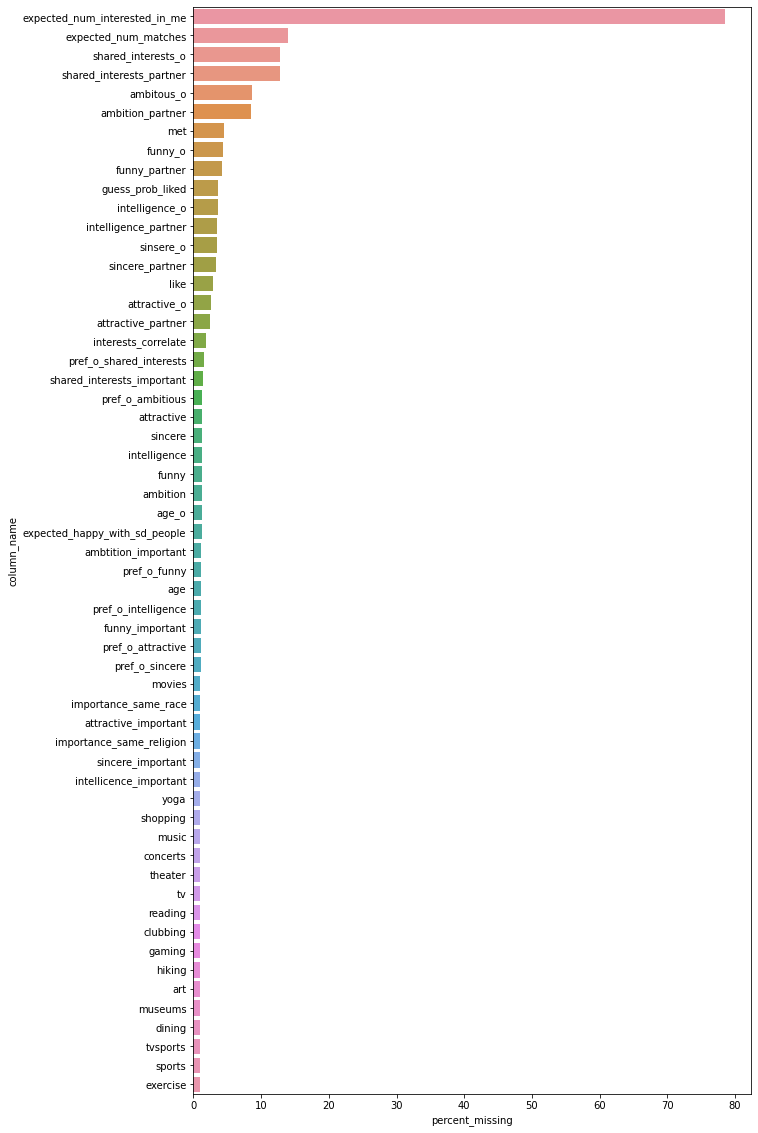

In [14]:
# Proportion of NA per variable
fig, ax = plt.subplots(figsize=(10, 20))
sns.barplot(data = missing_value_df[missing_value_df['percent_missing'] > 0].sort_values(by=['percent_missing'], 
                    ascending=False), y = 'column_name', x = 'percent_missing')

In [15]:
# Create a list with column names that have more than 10% NA
coloana_na = missing_value_df.loc[missing_value_df['percent_missing'] >= 10, 'column_name'].tolist()
coloana_na 

['shared_interests_o',
 'shared_interests_partner',
 'expected_num_interested_in_me',
 'expected_num_matches']

In [16]:
coloana_na.remove('expected_num_interested_in_me')

In [17]:
# Create binary variables for each variable that has more than 10 NA
# 0: where we have values on the respective variable 
# 1: where we have NA
for each in coloana_na:
    nume_coloana = each + '_na'
    data1[nume_coloana] = data1[each].isna().astype(int) 

In [18]:
data1[numerical_variable].drop('expected_num_interested_in_me', axis = 1)

,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked
0,21.0,27.0,6.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,...,10.0,10.0,9.0,8.0,1.0,0.14,3.0,4.0,7.0,6.0
1,21.0,22.0,1.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,...,10.0,10.0,9.0,8.0,1.0,0.54,3.0,4.0,7.0,5.0
2,21.0,22.0,1.0,2.0,4.0,19.0,18.0,19.0,18.0,14.0,...,10.0,10.0,9.0,8.0,1.0,0.16,3.0,4.0,7.0,NaN
3,21.0,23.0,2.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,...,10.0,10.0,9.0,8.0,1.0,0.61,3.0,4.0,7.0,6.0
4,21.0,24.0,3.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,...,10.0,10.0,9.0,8.0,1.0,0.21,3.0,4.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,25.0,26.0,1.0,1.0,1.0,10.0,10.0,30.0,20.0,10.0,...,9.0,10.0,10.0,7.0,3.0,0.64,10.0,3.0,2.0,5.0
8374,25.0,24.0,1.0,1.0,1.0,50.0,20.0,10.0,5.0,10.0,...,9.0,10.0,10.0,7.0,3.0,0.71,10.0,3.0,4.0,4.0
8375,25.0,29.0,4.0,1.0,1.0,40.0,10.0,30.0,10.0,10.0,...,9.0,10.0,10.0,7.0,3.0,-0.46,10.0,3.0,6.0,5.0
8376,25.0,22.0,3.0,1.0,1.0,10.0,25.0,25.0,10.0,10.0,...,9.0,10.0,10.0,7.0,3.0,0.62,10.0,3.0,5.0,5.0


In [19]:
# In the original variables, replace the NA values with the median
data1[numerical_variable] = data1[numerical_variable].fillna(data1[numerical_variable].median())
data1[numerical_variable]

,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked
0,21.0,27.0,6.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,...,10.0,9.0,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0
1,21.0,22.0,1.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,...,10.0,9.0,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0
2,21.0,22.0,1.0,2.0,4.0,19.0,18.0,19.0,18.0,14.0,...,10.0,9.0,8.0,1.0,0.16,3.0,2.0,4.0,7.0,5.0
3,21.0,23.0,2.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,...,10.0,9.0,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0
4,21.0,24.0,3.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,...,10.0,9.0,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,25.0,26.0,1.0,1.0,1.0,10.0,10.0,30.0,20.0,10.0,...,10.0,10.0,7.0,3.0,0.64,10.0,4.0,3.0,2.0,5.0
8374,25.0,24.0,1.0,1.0,1.0,50.0,20.0,10.0,5.0,10.0,...,10.0,10.0,7.0,3.0,0.71,10.0,4.0,3.0,4.0,4.0
8375,25.0,29.0,4.0,1.0,1.0,40.0,10.0,30.0,10.0,10.0,...,10.0,10.0,7.0,3.0,-0.46,10.0,4.0,3.0,6.0,5.0
8376,25.0,22.0,3.0,1.0,1.0,10.0,25.0,25.0,10.0,10.0,...,10.0,10.0,7.0,3.0,0.62,10.0,4.0,3.0,5.0,5.0


## *Graphic analysis of numerical variable*

In [20]:
scaler = MinMaxScaler()
data1[numerical_variable] = scaler.fit_transform(data1[numerical_variable])

<AxesSubplot:>

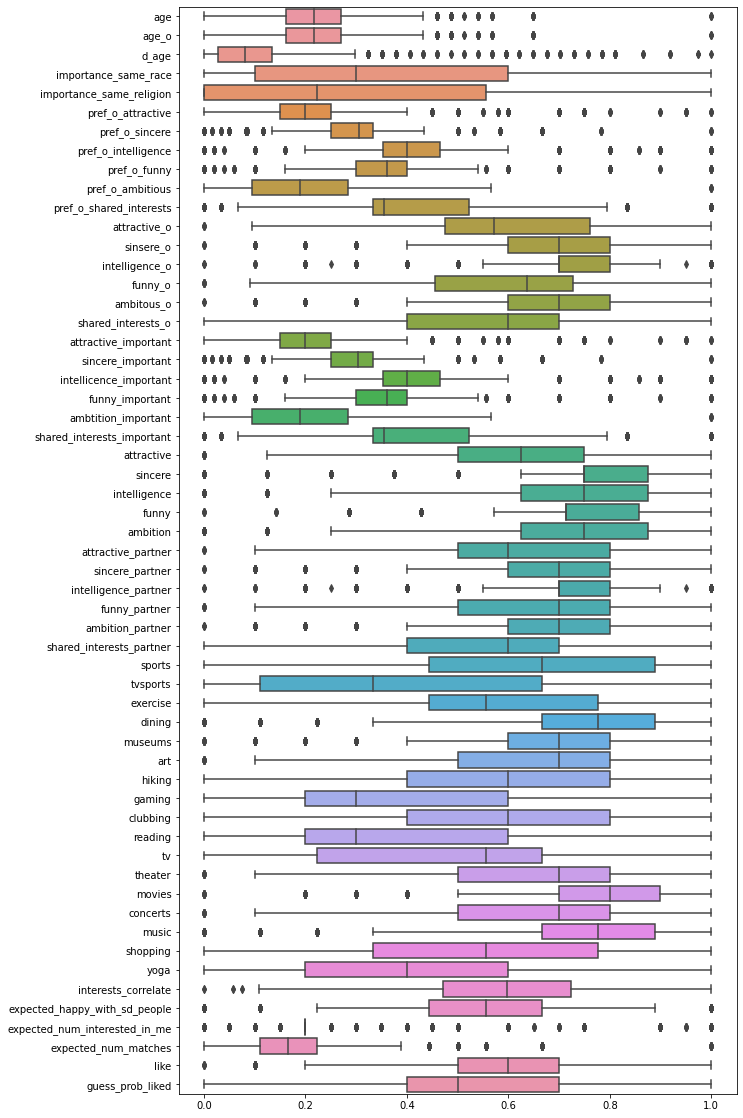

In [21]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.boxplot(data=data1[numerical_variable], orient="h")

## *Inspection and cleaning of  the categorical variables*

In [22]:
# Inspect the categorical variables
categorical_variable = data1.select_dtypes(include = ['category', 'O'])

In [23]:
categorical_variable_columns = categorical_variable.columns.tolist()

In [24]:
# Descriptive statistics of the variables
# Saving in a different variable the name of the column, variable type, number of missing values and descriptive_statistics

def variable_descriptive_analysis(column):
    column_name = column.name
    type_column = column.dtype
    missing_values = column.isna().sum()
    descriptive_statistics = column.describe()
    descriptive_statistics = descriptive_statistics.to_string(index = True).replace('\n', '\n ')
  
      
    # display the previously saved values in the variables 
    print(f'----------  {column_name}  ----------')
    print(f'Variable type: {type_column}')
    print(f'Number of missing values: {missing_values}')
    print(f'Descriptive_statistics: \n {descriptive_statistics}')
    print('----------\n')
    return None

In [25]:
for each in data1.select_dtypes(include = ['category', 'O']):
    column = data1[each]
    variable_descriptive_analysis(column)

----------  has_null  ----------
Variable type: object
Number of missing values: 0
Descriptive_statistics: 
 count     8378
 unique       2
 top          1
 freq      7330
----------

----------  wave  ----------
Variable type: category
Number of missing values: 0
Descriptive_statistics: 
 count     8378.0
 unique      21.0
 top         21.0
 freq       968.0
----------

----------  gender  ----------
Variable type: object
Number of missing values: 0
Descriptive_statistics: 
 count     8378
 unique       2
 top       male
 freq      4194
----------

----------  d_d_age  ----------
Variable type: object
Number of missing values: 0
Descriptive_statistics: 
 count      8378
 unique        4
 top       [2-3]
 freq       2406
----------

----------  race  ----------
Variable type: object
Number of missing values: 0
Descriptive_statistics: 
 count                            8378
 unique                              6
 top       European/Caucasian-American
 freq                             47

In [26]:
# Recode 'wave' variable 
data1['wave'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
                        ['Session_1', 'Session_2','Session_3', 'Session_4', 'Session_5', 'Session_6', 'Session_7', 
                          'Session_8', 'Session_9', 'Session_10', 'Session_11', 'Session_12', 'Session_13', 'Session_14', 
                          'Session_15','Session_16', 'Session_17','Session_18', 'Session_19', 'Session_20', 'Session_21'],
                            inplace=True)

In [27]:
# Transform the variable 'met' from 7 levels to 2, because everything that is
# 1: represent a pozitive decision (the person want to see each other again)
# 0: represent a negative decision
data1['met'] = data1.apply(lambda x: 'Yes' if x['met'] < 1 else 'No', axis = 1)
data1['met'] 

0       Yes
1        No
2        No
3       Yes
4       Yes
       ... 
8373    Yes
8374    Yes
8375    Yes
8376    Yes
8377    Yes
Name: met, Length: 8378, dtype: object

In [28]:
# Recode the variable 'decision'
data1['decision'] = data1.apply(lambda x: 'Like' if x['decision'] == '1' else 'Dislike', axis = 1)
data1['decision'] 

0          Like
1          Like
2          Like
3          Like
4          Like
         ...   
8373    Dislike
8374    Dislike
8375    Dislike
8376    Dislike
8377    Dislike
Name: decision, Length: 8378, dtype: object

In [29]:
# Recode the variable 'samerace' 
data1['samerace'] = data1.apply(lambda x: 'Yes' if x['samerace'] == '1' else 'No', axis = 1)
data1['samerace'] 

0        No
1        No
2       Yes
3        No
4        No
       ... 
8373     No
8374     No
8375     No
8376     No
8377     No
Name: samerace, Length: 8378, dtype: object

In [30]:
# Transform levels of the 'field' variable
data1['field'] = data1['field'].str.title()
data1['field']

0                    Law
1                    Law
2                    Law
3                    Law
4                    Law
              ...       
8373    Climate Dynamics
8374    Climate Dynamics
8375    Climate Dynamics
8376    Climate Dynamics
8377    Climate Dynamics
Name: field, Length: 8378, dtype: object

In [31]:
# See the frequency of the values in the variable 'field' and select the first 10 frequency
frecquency = data1['field'].value_counts().reset_index()
frecquency.columns = ['field','number']
top_10 = frecquency.iloc[0:9, 0].tolist()

In [32]:
data1['field'] = data1.apply(lambda x: x.field if x.field in top_10 else 'other', axis = 1)
data1['field'] 

0         Law
1         Law
2         Law
3         Law
4         Law
        ...  
8373    other
8374    other
8375    other
8376    other
8377    other
Name: field, Length: 8378, dtype: object

In [33]:
data1 = data1.drop('match', axis=1)

In [34]:
# Create a oneHotEncoder object, and fit it to all of data
# select just columns needed to be encoded
data_categorical = data1.select_dtypes(include = ['category', 'O'])
data_numerical = data1.select_dtypes(exclude = ['category', 'O'])

data_categorical_transformed = pd.get_dummies(data_categorical, drop_first=True)

data1_processed = data_numerical.join(data_categorical_transformed)

#data1_processed = data_numerical.join(onehotlabels)
data1_processed.head()

,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,d_expected_num_interested_in_me_[4-9],d_expected_num_matches_[3-5],d_expected_num_matches_[5-18],d_like_[6-8],d_like_[9-10],d_guess_prob_liked_[5-6],d_guess_prob_liked_[7-10],met_Yes,decision_Like,decision_o_1
0,0.081081,0.243243,0.162162,0.2,0.333333,0.35,0.333333,0.40,0.40,0.000000,...,0,1,0,1,0,1,0,1,1,0
1,0.081081,0.108108,0.027027,0.2,0.333333,0.60,0.000000,0.00,0.80,0.000000,...,0,1,0,1,0,1,0,0,1,0
2,0.081081,0.108108,0.027027,0.2,0.333333,0.19,0.300000,0.38,0.36,0.264151,...,0,1,0,1,0,0,0,0,1,1
3,0.081081,0.135135,0.054054,0.2,0.333333,0.30,0.083333,0.30,0.80,0.094340,...,0,1,0,1,0,1,0,1,1,1
4,0.081081,0.162162,0.081081,0.2,0.333333,0.30,0.166667,0.40,0.20,0.188679,...,0,1,0,1,0,1,0,1,1,1


## *Random Forest*

In [35]:
# Divide the data into what will be used for training the model, the features (x), and what we want to predict, the label(y)
y = data1_processed['decision_Like']
x = data1_processed.drop(['decision_Like'], axis=1)

# Saving feature names for later use
x_columns = list(x.columns)

In [36]:
# Divide them into the train and test sets
# We are using 30% of the data for testing and 70% for training

SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=30/100, 
                                                    random_state=SEED)

print(f"No. of training examples: {x_train.shape[0]}")
print(f"No. of testing examples: {x_test.shape[0]}")

No. of training examples: 5864
No. of testing examples: 2514


In [45]:
# Expect the training features number of columns to match the testing feature number of columns and 
# the number of rows to match for the respective training and testing features and the labels
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (5864, 215)
Training Labels Shape: (5864,)
Testing Features Shape: (2514, 215)
Testing Labels Shape: (2514,)


In [47]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = SEED)

# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
predictions

array([0.01, 0.01, 0.69, ..., 0.05, 0.9 , 0.79])

In [49]:
# comparing some of predicted values with the actual values and see how accurate we were:
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
4730,0,0.01
8168,0,0.01
2333,1,0.69
5426,0,0.04
5407,1,0.98
...,...,...
3303,1,0.82
5556,1,0.44
1789,0,0.05
3616,1,0.90


In [41]:
# evaluate performance of algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.26815831344470964
Mean Squared Error: 0.12890513126491646
Root Mean Squared Error: 0.35903360743099866


In [121]:
feature_importance = rf.feature_importances_

forest_importances = pd.Series(feature_importance, index=feature_list)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [122]:
# Create arrays from feature importance and feature names
importances = pd.DataFrame(std)
feature_df = pd.DataFrame(feature_list)
feature_imp = np.array(importances)
feature_names = np.array(feature_df)

In [123]:
# Create a DataFrame using a Dictionary
data = ({'feature_names':feature_names,'feature_importance':feature_imp})
np_array = np.column_stack((feature_names,feature_imp))
df = pd.DataFrame(np_array)
df.columns = ['Feature', 'Importance']
df

,Feature,Importance
0,age,0.004066
1,age_o,0.004015
2,d_age,0.003631
3,importance_same_race,0.003334
4,importance_same_religion,0.003218
...,...,...
211,d_like_[9-10],0.000848
212,d_guess_prob_liked_[5-6],0.002329
213,d_guess_prob_liked_[7-10],0.001674
214,met_Yes,0.001431


In [124]:
# Sort the DataFrame in order decreasing feature importance
df.sort_values(by=['Importance'], ascending=False,inplace=True)

Text(0, 0.5, 'FEATURE NAMES')

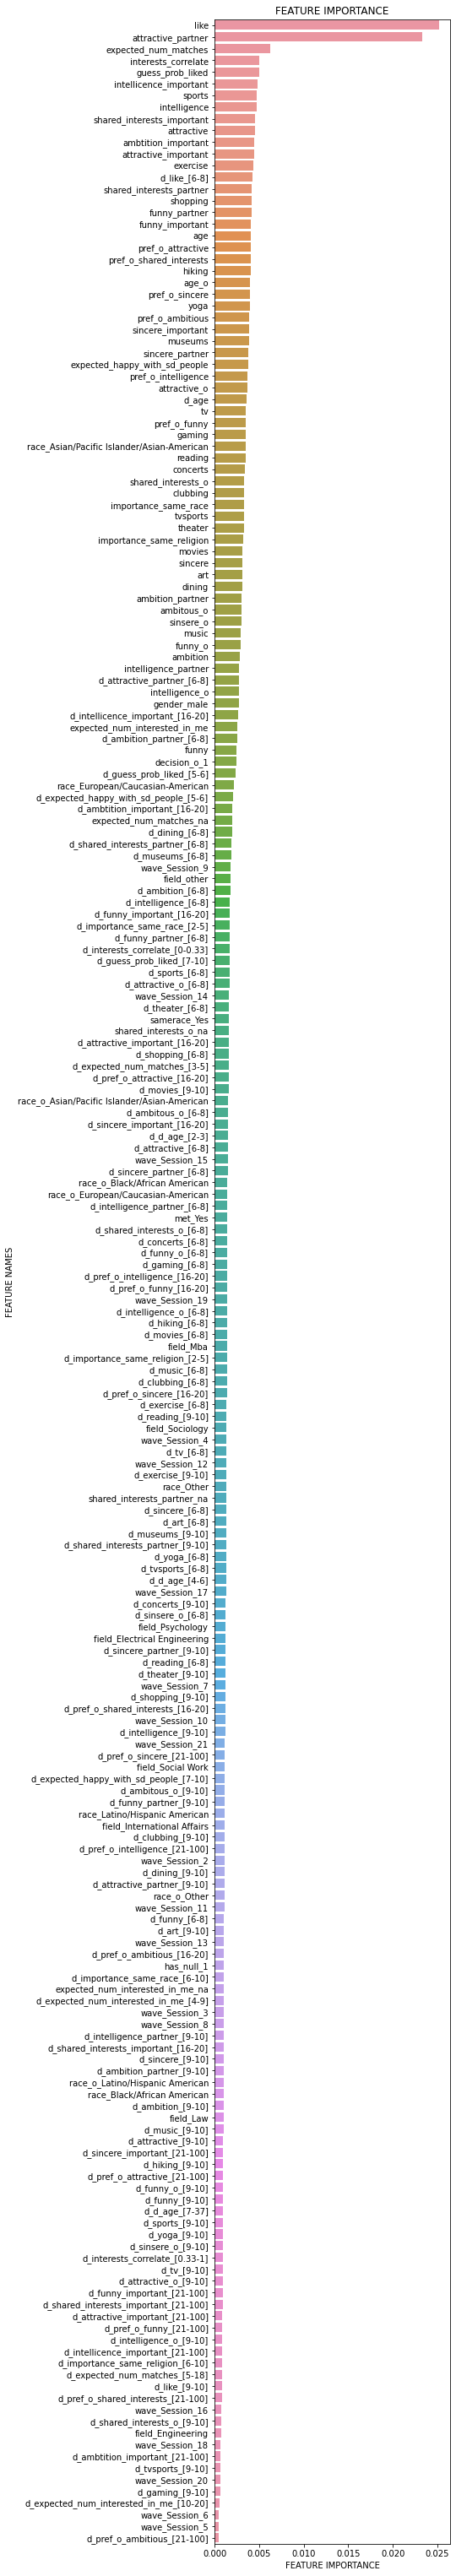

In [125]:
# Define size of bar plot
plt.figure(figsize=(5,55))
#Plot Searborn bar chart
sns.barplot(x = df['Importance'], y = df['Feature'])

#Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')